<a href="https://colab.research.google.com/github/vorges-data/gthc_dados/blob/master/provinha_dados_2025_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste Técnico - Projeto Dados GTHC

## Quem sou eu

Meu nome é Vinicius, sou aluno de Ciências Econômicas na UFABC e atualmente trabalho na área de Dados, minha história com Programação começou com a disciplina BCC (Bases Computacionais da Ciência), foi ai que conheci o glorioso Python.

Hoje meu foco de estudos estão nas IAs Generativas, Machine Learning, Econometria e Estatística. No meu tempo livre gosto de tocar guitarra e tentar gravar alguns covers.

E bebo mais café do que água e sem açucar, claro!

Vou deixar abaixo minhas redes para conhecer mais sobre mim.

Abraços,

[Linkedin](https://www.linkedin.com/in/viniciusleitedata/)  |
[GitHub](https://github.com/vorges-data)  |
[Blog](https://vorges.com.br/)

## 1.Introdução

Você está assumindo o papel de analista de dados em uma empresa de varejo online que opera nos Estados Unidos, vendendo uma variedade de produtos, incluindo móveis, tecnologia e materiais de escritório. A empresa deseja otimizar suas operações e melhorar a experiência do cliente, e para isso, precisa de uma análise detalhada dos pedidos realizados.

Foi fornecido um conjunto de dados que inclui informações sobre os pedidos feitos por diferentes clientes, os produtos adquiridos, formas de entrega, regiões, métodos de pagamento e os lucros gerados em cada transação. O dataset também contém informações sobre possíveis devoluções de produtos e a lucratividade de cada venda.


## 2.Desafio

Seu desafio é utilizar esses dados para fornecer insights importantes que ajudem a empresa a:

1. **Compreender o perfil dos clientes:** Quais são os segmentos de clientes mais frequentes (Corporate, Consumer) e quais produtos eles compram mais?

2. **Avaliar o desempenho das vendas:** Quais produtos ou categorias de produtos são mais lucrativos? Há alguma variação de lucro por região ou por modo de pagamento?

3. **Analisar a eficácia das entregas e pagamentos:** A forma de entrega ou o método de pagamento afeta o lucro ou o número de devoluções?


## Metadados

| Coluna                | Descrição                                 |
|---                    |   ---                                     |
| CODIGO_PEDIDO         | Código identificador do pedido            |
| DATA_PEDIDO           | Data da realização do pedido              |
| DATA_ENTREGA          | Data da entrega do pedido ao cliente      |
| FORMA_ENTREGA         | Forma de entrega selecionada pelo cliente |
| CODIGO_CLIENTE        | Código identificador de cliente           |
| NOME_CLIENTE          | Nome do cliente                           |
| SEGMENTO_CLIENTE      | Segmento do cliente                       |
| PAIS                  | País                                      |
| CIDADE                | Cidade                                    |
| ESTADO                | Estado                                    |
| REGIAO                | Região                                    |
| CODIGO_PRODUTO        | Código identificador do produto           |
| CATEGORIA_PRODUTO     | Categoria do produto                      |
| SUB_CATEGORIA_PRODUTO | Subcategoria do produto                   |
| NOME_PRODUTO          | Nome do produto                           |
| VALOR_PRODUTO         | Valor total do pedido                     |
| QUANTIDADE            | Quantidade de produtos                    |
| LUCRO                 | Lucro total do pedido                     |
| DEVOLUCAO             | Indicador de devolução do pedido          |
| MODO_PAGAMENTO        | Forma de pagamento do pedido              |


## 0. IMPORTS

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## 0.1 Config

In [2]:
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 1. CONEXÃO GOOGLE DRIVE (DATASET)

In [3]:
drive.mount('/content/drive')

def load_and_initial_analysis():
  """
  Carrega os dados e realiza uma análise incial
  """

  # Path Google Drive
  file_path = '/content/drive/MyDrive/Datasets/GTHC/vendas_supermercado.csv'


  try:
    df = pd.read_csv(file_path)
    print("Arquivo lido com sucesso!")
    print(f"Dimensões do df: {df.shape}")

    print(f"Número de linhas: {df.shape[0]}")
    print(f"Número de colunas: {df.shape[1]}")
    print(f"Período dos dados: {df['DATA_PEDIDO'].min()} a {df['DATA_PEDIDO'].max()}")

    return df

  except FileNotFoundError:
    print(f"Erro: O arquivo não foi encontrado em {file_path}")
    return None

  except Exception as e:
    print(f"Ocorreu um erro ao ler o arquivo: {e}")
    return None

df = load_and_initial_analysis()

Mounted at /content/drive
Arquivo lido com sucesso!
Dimensões do df: (5901, 21)
Número de linhas: 5901
Número de colunas: 21
Período dos dados: 2019-01-01 a 2020-12-31


In [4]:
df.head(5)

,Unnamed: 0,CODIGO_PEDIDO,DATA_PEDIDO,DATA_ENTREGA,FORMA_ENTREGA,CODIGO_CLIENTE,NOME_CLIENTE,SEGMENTO_CLIENTE,PAIS,CIDADE,...,REGIAO,CODIGO_PRODUTO,CATEGORIA_PRODUTO,SUB_CATEGORIA_PRODUTO,NOME_PRODUTO,VALOR_PRODUTO,QUANTIDADE,LUCRO,DEVOLUCAO,MODO_PAGAMENTO
0,0,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1.0,28.2668,No,Online
1,1,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3.0,38.2668,No,Online
2,2,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2.0,67.2742,No,Cards
3,3,CA-2019-125206,2019-01-03,2019-01-05,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2.0,28.6150,No,Online
4,4,US-2019-116365,2019-01-03,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2.0,-5.2640,No,Online


## 2. EDA

In [5]:
def exploratory_data_analysis(df):
  """
  Realiza uma análise exploratória dos dados
  """

  print(df.info())
  print(df.describe())
  null_counts = df.isnull().sum()
  null_percent = (null_counts / len(df)) * 100
  null_df = pd.DataFrame({
      'Coluna' : null_counts.index,
      'Valores Nulos' : null_counts.values,
      'Percentual (%)' : null_percent.values
  }).sort_values('Valores Nulos', ascending=False)

  display(null_df[null_df['Valores Nulos'] > 0 ])

  duplicates = df.duplicated().sum()
  print(f"Duplicatas encontrada: {duplicates}")

  categorical_cols = ['SEGMENTO_CLIENTE', 'REGIAO', 'CATEGORIA_PRODUTO',
                       'FORMA_ENTREGA', 'MODO_PAGAMENTO', 'DEVOLUCAO']

  for col in categorical_cols:
      if col in df.columns:
          print(f"\n{col}:")
          print(df[col].value_counts())

  return df

exploratory_data_analysis(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5901 non-null   int64  
 1   CODIGO_PEDIDO          5901 non-null   object 
 2   DATA_PEDIDO            5901 non-null   object 
 3   DATA_ENTREGA           5801 non-null   object 
 4   FORMA_ENTREGA          5801 non-null   object 
 5   CODIGO_CLIENTE         5801 non-null   object 
 6   NOME_CLIENTE           5801 non-null   object 
 7   SEGMENTO_CLIENTE       5801 non-null   object 
 8   PAIS                   5801 non-null   object 
 9   CIDADE                 5801 non-null   object 
 10  ESTADO                 5801 non-null   object 
 11  REGIAO                 5801 non-null   object 
 12  CODIGO_PRODUTO         5801 non-null   object 
 13  CATEGORIA_PRODUTO      5801 non-null   object 
 14  SUB_CATEGORIA_PRODUTO  5801 non-null   object 
 15  NOME

,Coluna,Valores Nulos,Percentual (%)
4,FORMA_ENTREGA,100,1.694628
3,DATA_ENTREGA,100,1.694628
7,SEGMENTO_CLIENTE,100,1.694628
6,NOME_CLIENTE,100,1.694628
5,CODIGO_CLIENTE,100,1.694628
13,CATEGORIA_PRODUTO,100,1.694628
14,SUB_CATEGORIA_PRODUTO,100,1.694628
15,NOME_PRODUTO,100,1.694628
8,PAIS,100,1.694628
9,CIDADE,100,1.694628


Duplicatas encontrada: 0

SEGMENTO_CLIENTE:
SEGMENTO_CLIENTE
Consumer       2948
Corporate      1745
Home Office    1108
Name: count, dtype: int64

REGIAO:
REGIAO
West       1872
East       1656
Central    1363
South       910
Name: count, dtype: int64

CATEGORIA_PRODUTO:
CATEGORIA_PRODUTO
Office Supplies    3511
Furniture          1234
Technology         1056
Name: count, dtype: int64

FORMA_ENTREGA:
FORMA_ENTREGA
Standard Class    3397
Second Class      1123
First Class        943
Same Day           338
Name: count, dtype: int64

MODO_PAGAMENTO:
MODO_PAGAMENTO
COD       2418
Online    2125
Cards     1258
Name: count, dtype: int64

DEVOLUCAO:
DEVOLUCAO
No     5519
Yes     282
Name: count, dtype: int64


,Unnamed: 0,CODIGO_PEDIDO,DATA_PEDIDO,DATA_ENTREGA,FORMA_ENTREGA,CODIGO_CLIENTE,NOME_CLIENTE,SEGMENTO_CLIENTE,PAIS,CIDADE,...,REGIAO,CODIGO_PRODUTO,CATEGORIA_PRODUTO,SUB_CATEGORIA_PRODUTO,NOME_PRODUTO,VALOR_PRODUTO,QUANTIDADE,LUCRO,DEVOLUCAO,MODO_PAGAMENTO
0,0,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.940,1.0,28.2668,No,Online
1,1,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.940,3.0,38.2668,No,Online
2,2,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.980,2.0,67.2742,No,Cards
3,3,CA-2019-125206,2019-01-03,2019-01-05,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.460,2.0,28.6150,No,Online
4,4,US-2019-116365,2019-01-03,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.080,2.0,-5.2640,No,Online
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5896,5896,CA-2020-143259,2020-12-30,2021-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",213.136,4.0,12.1176,No,COD
5897,5897,CA-2020-115427,2020-12-30,2021-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",295.904,2.0,4.5188,Yes,Online
5898,5898,CA-2020-156720,2020-12-30,2021-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,388.024,3.0,-0.6048,No,Online
5899,5899,CA-2020-143259,2020-12-30,2021-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,462.776,3.0,19.7910,No,COD


## 3. TRANSFORMAÇÃO

In [6]:
def data_transformation(df):
  """
  Realiza a transformação dos dados
  """

  # Cópia do df
  df_clean = df.copy()

  # Convertes colunas de Data
  date_columns = ['DATA_PEDIDO', 'DATA_ENTREGA']
  for col in date_columns:
    df_clean[col] = pd.to_datetime(df_clean[col])

  # Calcular tempo de entrega
  df_clean['TEMPO_ENTREGA'] = (df_clean['DATA_ENTREGA'] - df_clean['DATA_PEDIDO']).dt.days

  # Features temporais
  df_clean['ANO'] = df_clean['DATA_PEDIDO'].dt.year
  df_clean['MES'] = df_clean['DATA_PEDIDO'].dt.month
  df_clean['DIA'] = df_clean['DATA_PEDIDO'].dt.day
  df_clean['DIA_SEMANA'] = df_clean['DATA_PEDIDO'].dt.dayofweek
  df_clean['TRIMESTRE'] = df_clean['DATA_PEDIDO'].dt.quarter

  # Variável de receita total
  df_clean['RECEITA_TOTAL'] = df_clean['VALOR_PRODUTO'] * df_clean['QUANTIDADE']

  # Variável Margem de Lucro
  df_clean['MARGEM_LUCRO'] = (df_clean['LUCRO'] / df_clean['RECEITA_TOTAL']) * 100
  df_clean['MARGEM_LUCRO'] = df_clean['MARGEM_LUCRO'].replace([np.inf, -np.inf], np.nan)

  # Criar flag para produtos com devolução
  df_clean['TEM_DEVOLUCAO'] = (df_clean['DEVOLUCAO'] == 'Yes').astype(int)

  # Tratar Outliers usando IQR
  numeric_cols = ['VALOR_PRODUTO', 'QUANTIDADE', 'LUCRO', 'RECEITA_TOTAL', 'MARGEM_LUCRO']

  for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_before = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()
    print(f"{col}: {outliers_before} outliers detectados")


  # Remover colunas desnecessárias
  columns_to_drop = ['Unnamed: 0'] if 'Unnamed: 0' in df_clean.columns else []
  if columns_to_drop:
    df_clean = df_clean.drop(columns=columns_to_drop)


  return df_clean

df_clean = data_transformation(df)

VALOR_PRODUTO: 605 outliers detectados
QUANTIDADE: 85 outliers detectados
LUCRO: 1119 outliers detectados
RECEITA_TOTAL: 658 outliers detectados
MARGEM_LUCRO: 749 outliers detectados


In [7]:
def visualize_outliers(df):
  """
  Visualiza os outliers
  """

  # Colunas numéricas
  numeric_cols = ['VALOR_PRODUTO', 'QUANTIDADE', 'LUCRO', 'RECEITA_TOTAL', 'MARGEM_LUCRO']

  # Loop para criar gráficos
  for col in numeric_cols:
      plt.figure(figsize=(12, 5))
      plt.suptitle(f'Análise de Outliers para: {col}', fontsize=16)

      # Gráfico 1: Box Plot
      plt.subplot(1, 2, 1)
      sns.boxplot(y=df_clean[col], color='darkblue')
      plt.title('Box Plot')
      plt.ylabel(col)
      plt.grid(True)

      # Gráfico 2: Histograma com KDE
      plt.subplot(1, 2, 2)
      sns.histplot(df_clean[col], kde=True, bins=40, color='darkblue')
      plt.title('Histograma com KDE')
      plt.xlabel(col)
      plt.grid(True)

      # Ajusta o layout
      plt.tight_layout(rect=[0, 0.03, 1, 0.95])

      plt.show()

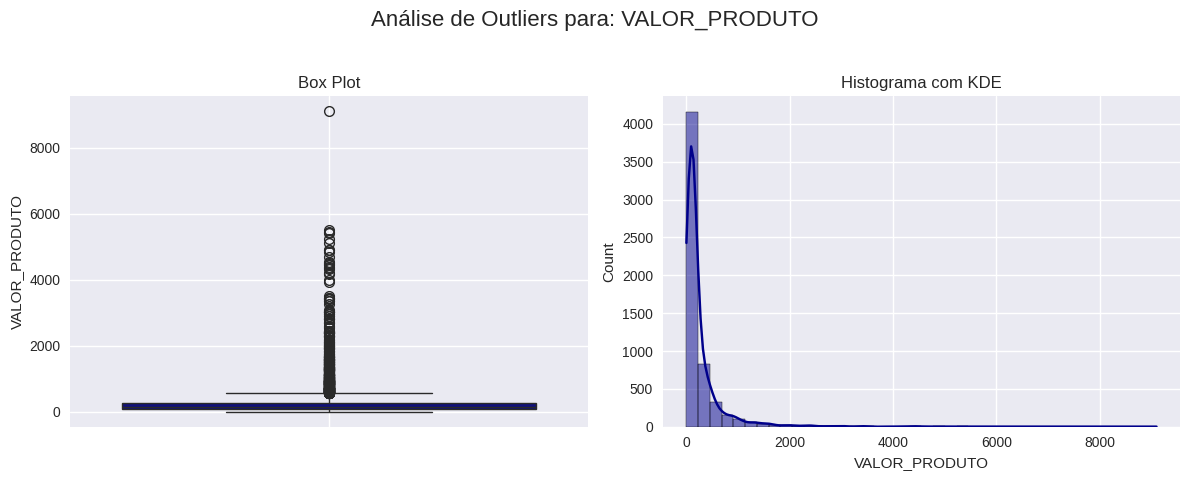

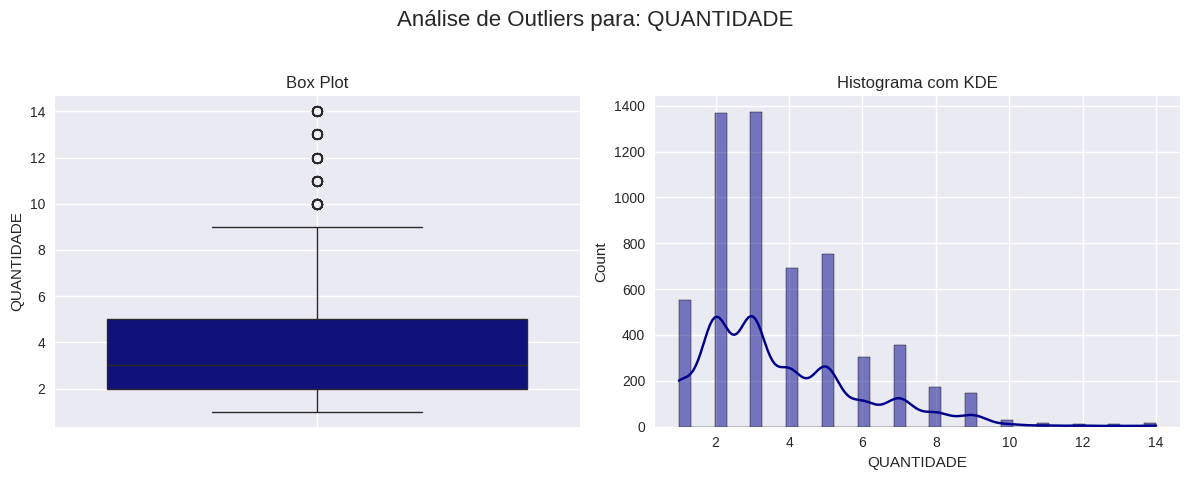

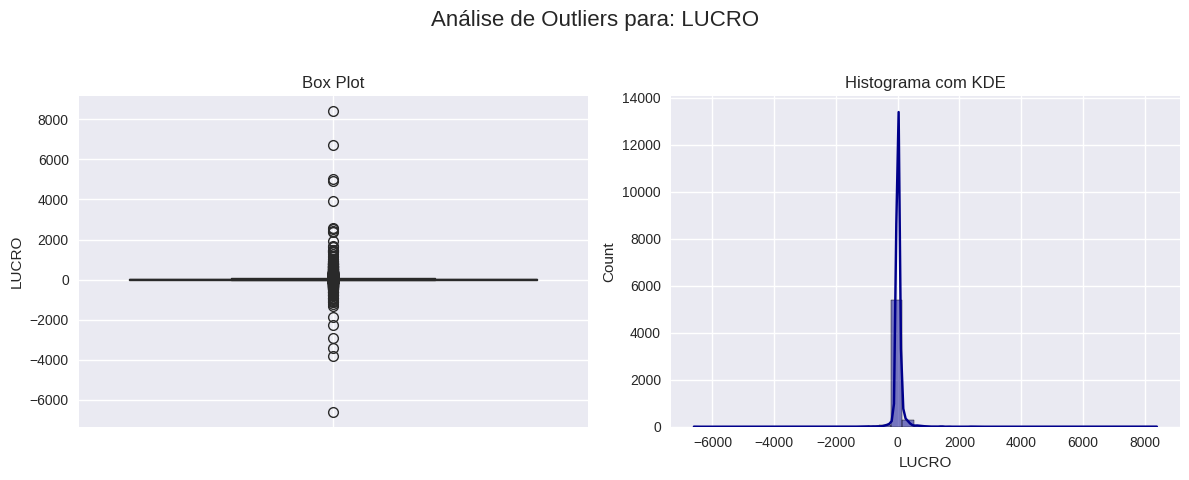

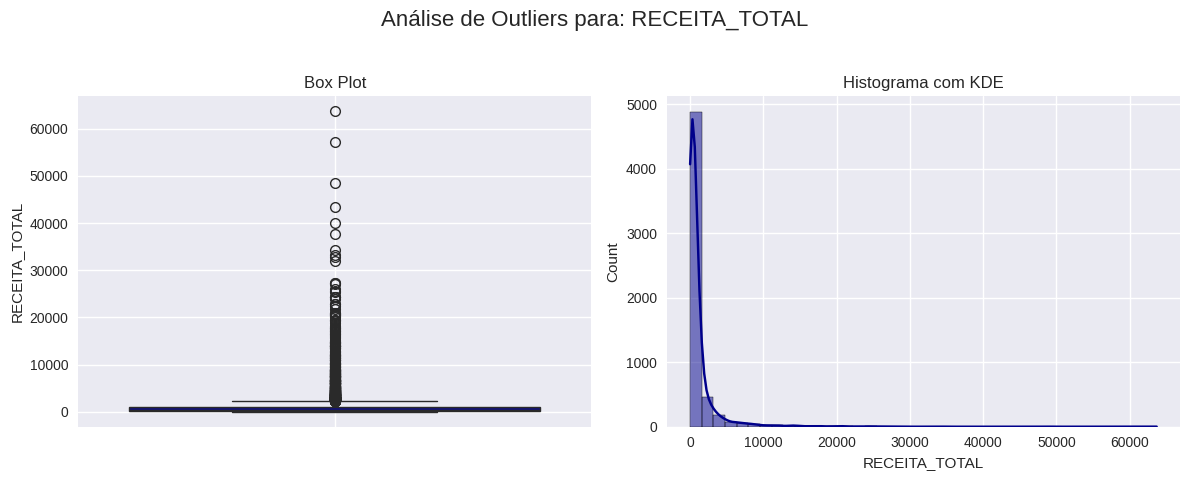

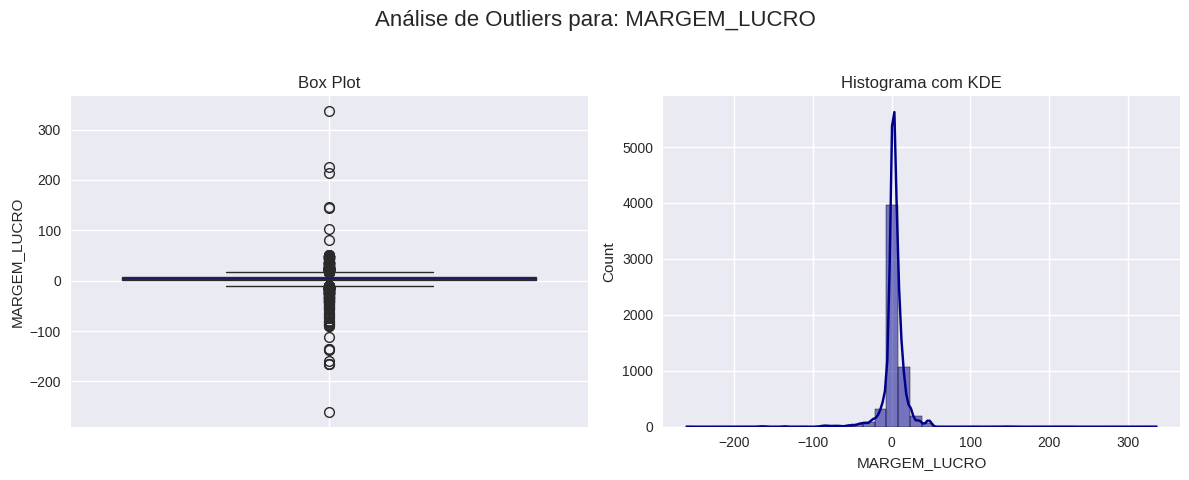

In [8]:
visualize_outliers(df_clean)

In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CODIGO_PEDIDO          5901 non-null   object        
 1   DATA_PEDIDO            5901 non-null   datetime64[ns]
 2   DATA_ENTREGA           5801 non-null   datetime64[ns]
 3   FORMA_ENTREGA          5801 non-null   object        
 4   CODIGO_CLIENTE         5801 non-null   object        
 5   NOME_CLIENTE           5801 non-null   object        
 6   SEGMENTO_CLIENTE       5801 non-null   object        
 7   PAIS                   5801 non-null   object        
 8   CIDADE                 5801 non-null   object        
 9   ESTADO                 5801 non-null   object        
 10  REGIAO                 5801 non-null   object        
 11  CODIGO_PRODUTO         5801 non-null   object        
 12  CATEGORIA_PRODUTO      5801 non-null   object        
 13  SUB

In [10]:
df_clean.head(5)

,CODIGO_PEDIDO,DATA_PEDIDO,DATA_ENTREGA,FORMA_ENTREGA,CODIGO_CLIENTE,NOME_CLIENTE,SEGMENTO_CLIENTE,PAIS,CIDADE,ESTADO,...,MODO_PAGAMENTO,TEMPO_ENTREGA,ANO,MES,DIA,DIA_SEMANA,TRIMESTRE,RECEITA_TOTAL,MARGEM_LUCRO,TEM_DEVOLUCAO
0,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,...,Online,6.0,2019,1,1,1,1,73.94,38.229375,0
1,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,...,Online,5.0,2019,1,2,2,1,521.82,7.333333,0
2,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,...,Cards,5.0,2019,1,2,2,1,463.96,14.500000,0
3,CA-2019-125206,2019-01-03,2019-01-05,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,California,...,Online,2.0,2019,1,3,3,1,228.92,12.500000,0
4,US-2019-116365,2019-01-03,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,Texas,...,Online,5.0,2019,1,3,3,1,60.16,-8.750000,0


## 4. VISUALIZAÇÃO

In [11]:
def create_visualizations(df):
  """
  Cria visualizações dos dados
  """

  # Configurar subplots
  fig, axes = plt.subplots(2, 3, figsize=(20, 12))
  fig.suptitle("ANÁLISE EXPLORATÓRIA - PRINCIPAIS MÉTRICAS", fontsize = 16, fontweight = 'bold')

  # 1. Distribuição das Vendas por Segmento
  df_clean['SEGMENTO_CLIENTE'].value_counts().plot(kind='bar', ax=axes[0,0], color='skyblue')
  axes[0,0].set_title('Vendas por Segmento de Cliente')
  axes[0,0].set_xlabel('Segmento')
  axes[0,0].set_ylabel('Quantidade de Pedidos')
  axes[0,0].tick_params(axis='x', rotation=45)

  # 2. Distribuição de Lucro
  axes[0,1].hist(df_clean['LUCRO'], bins=50, color='lightgreen', alpha=0.7)
  axes[0,1].set_title('Distribuição do Lucro')
  axes[0,1].set_xlabel('Lucro ($)')
  axes[0,1].set_ylabel('Frequência')
  axes[0,1].axvline(df['LUCRO'].mean(), color='red', linestyle='--', label='Média')
  axes[0,1].legend()

  # 3. Vendas por Categoria de Produto
  df_clean['CATEGORIA_PRODUTO'].value_counts().plot(kind='pie', ax=axes[0,2], autopct='%1.1f%%')
  axes[0,2].set_title('Distribuição por Categoria de Produto')

   # 4. Vendas por Região
  df_clean['REGIAO'].value_counts().plot(kind='bar', ax=axes[1,0], color='coral')
  axes[1,0].set_title('Vendas por Região')
  axes[1,0].set_xlabel('Região')
  axes[1,0].set_ylabel('Quantidade de Pedidos')
  axes[1,0].tick_params(axis='x', rotation=45)

   # 5. Forma de Entrega
  df_clean['FORMA_ENTREGA'].value_counts().plot(kind='bar', ax=axes[1,1], color='gold')
  axes[1,1].set_title('Distribuição por Forma de Entrega')
  axes[1,1].set_xlabel('Forma de Entrega')
  axes[1,1].set_ylabel('Quantidade de Pedidos')
  axes[1,1].tick_params(axis='x', rotation=45)

  # 6. Método de Pagamento
  df_clean['MODO_PAGAMENTO'].value_counts().plot(kind='pie', ax=axes[1,2], autopct='%1.1f%%')
  axes[1,2].set_title('Distribuição por Método de Pagamento')

  plt.tight_layout()
  plt.show()


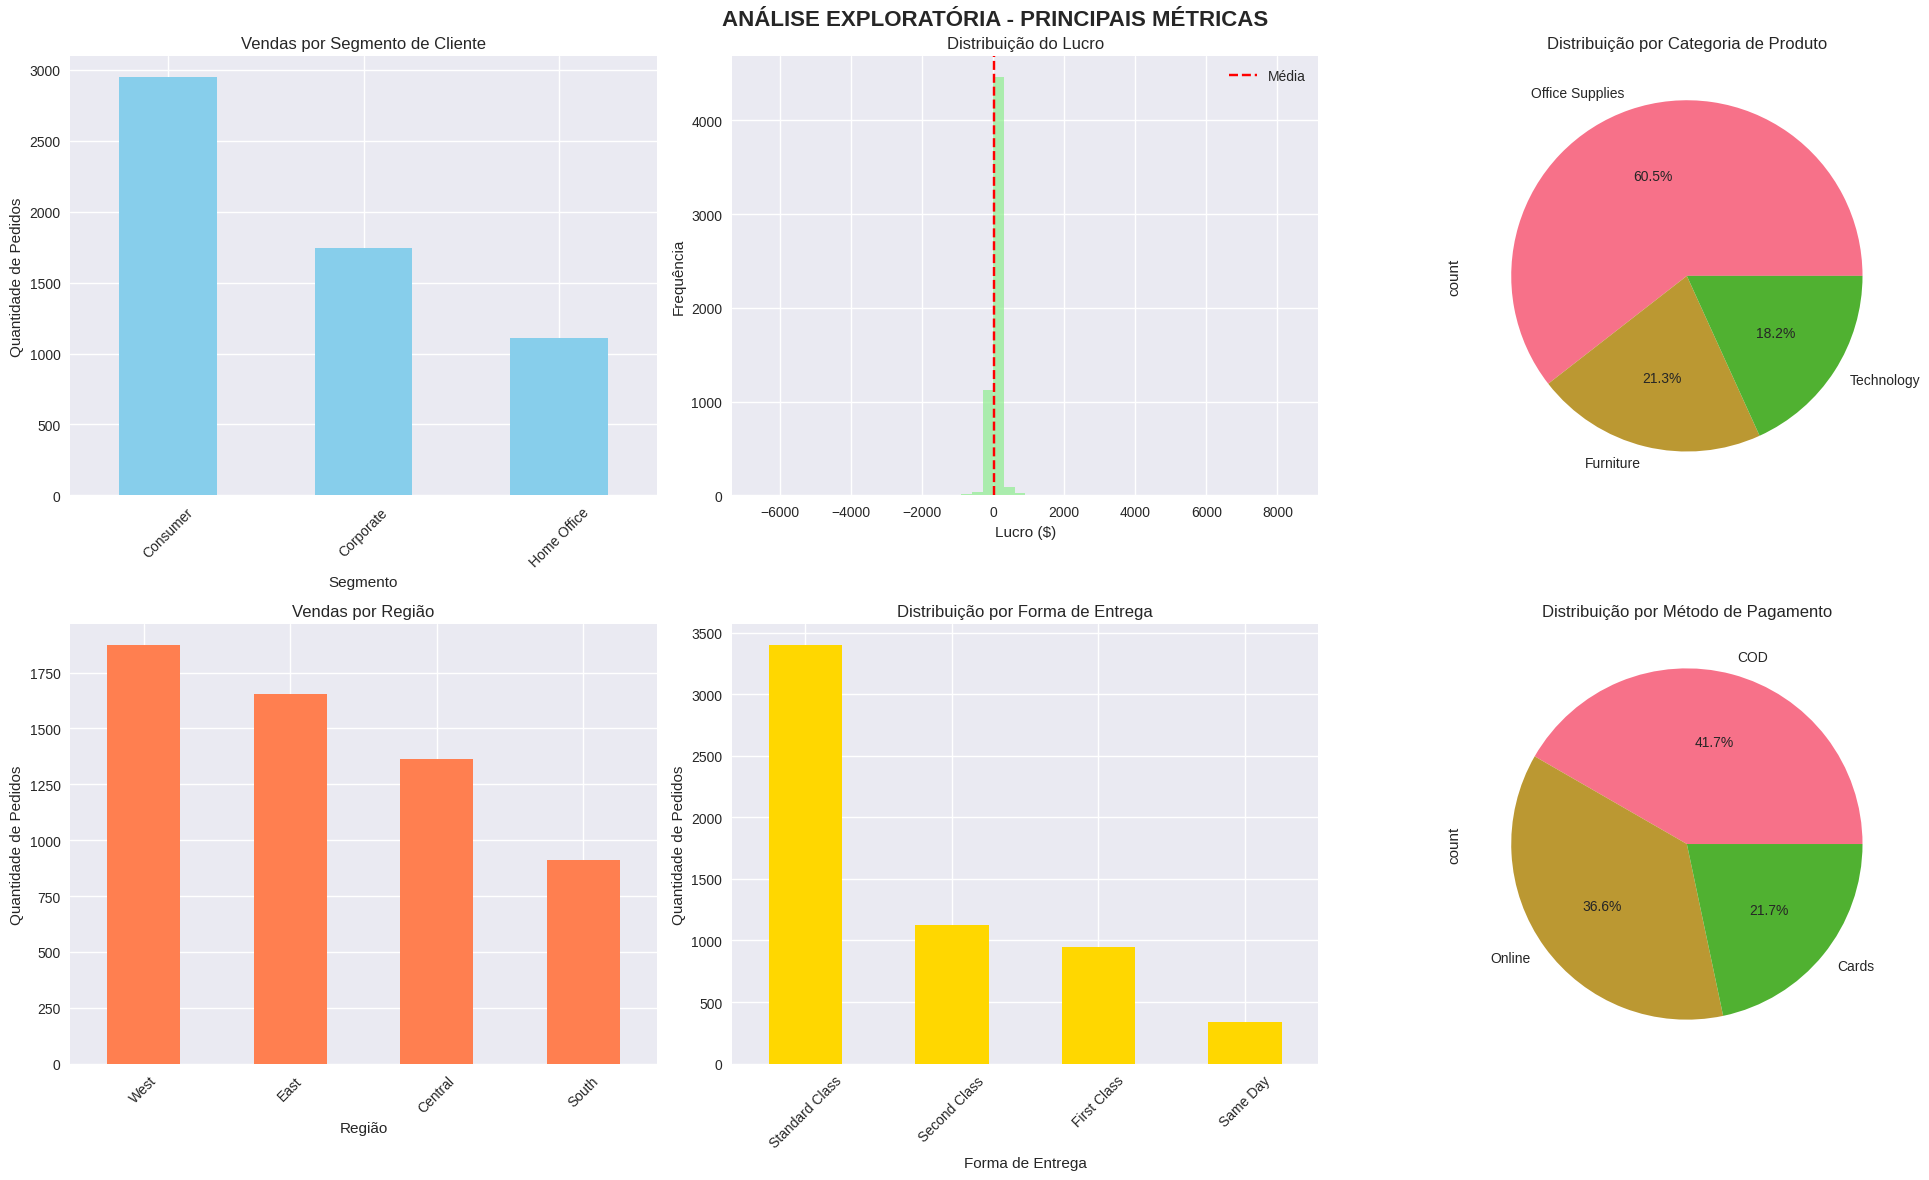

In [12]:
create_visualizations(df_clean)

## 5. INSIGHTS DE NEGÓCIO

In [13]:
def business_analysis(df):
  """
  Realiza análises de negócio para responder as perguntas de negócio

  """

  # 1. Perfil dos Clientes
  segment_analysis = df.groupby('SEGMENTO_CLIENTE').agg({
        'CODIGO_PEDIDO': 'count',
        'RECEITA_TOTAL': 'sum',
        'LUCRO': 'sum',
        'QUANTIDADE': 'sum'
    }).round(2)

  segment_analysis.columns = ['Total_Pedidos', 'Receita_Total', 'Lucro_Total', 'Quantidade_Total']

  # 2. Produtos mais comprados por segmento
  for segment in df['SEGMENTO_CLIENTE'].unique():
      top_products = df[df['SEGMENTO_CLIENTE'] == segment].groupby('CATEGORIA_PRODUTO')['QUANTIDADE'].sum().sort_values(ascending=False).head(5)


  # 3. Produtos mais lucrativos
  product_performance = df.groupby('CATEGORIA_PRODUTO').agg({
        'LUCRO': ['sum', 'mean'],
        'RECEITA_TOTAL': 'sum',
        'CODIGO_PEDIDO': 'count'
    }).round(2)

  product_performance.columns = ['Lucro_Total', 'Lucro_Medio', 'Receita_Total', 'Num_Pedidos']

  # 4. Performance por região
  region_performance = df.groupby('REGIAO').agg({
      'LUCRO': ['sum', 'mean'],
      'RECEITA_TOTAL': 'sum',
      'TEM_DEVOLUCAO': 'mean'
  }).round(2)

  region_performance.columns = ['Lucro_Total', 'Lucro_Medio', 'Receita_Total', 'Taxa_Devolucao']

  # 5. Impacto da forma de entrega
  delivery_analysis = df.groupby('FORMA_ENTREGA').agg({
      'LUCRO': 'mean',
      'TEM_DEVOLUCAO': 'mean',
      'TEMPO_ENTREGA': 'mean',
      'CODIGO_PEDIDO': 'count'
  }).round(2)

  delivery_analysis.columns = ['Lucro_Medio', 'Taxa_Devolucao', 'Tempo_Entrega_Medio', 'Num_Pedidos']

  # 6. Impacto do método de pagamento
  payment_analysis = df.groupby('MODO_PAGAMENTO').agg({
      'LUCRO': 'mean',
      'TEM_DEVOLUCAO': 'mean',
      'RECEITA_TOTAL': 'mean',
      'CODIGO_PEDIDO': 'count'
  }).round(2)

  payment_analysis.columns = ['Lucro_Medio', 'Taxa_Devolucao', 'Receita_Media', 'Num_Pedidos']

  return segment_analysis, product_performance, region_performance



In [14]:
from IPython.display import display

segment_analysis, product_performance, region_performance = business_analysis(df_clean)

print("Perfil dos Clientes:")
display(segment_analysis)

print("\n Produtos Mais Lucrativos:")
display(product_performance)

print("\n Performance por Região:")
display(region_performance)

Perfil dos Clientes:


,Total_Pedidos,Receita_Total,Lucro_Total,Quantidade_Total
SEGMENTO_CLIENTE,,,,
Consumer,2948,3384120.37,76055.54,11019.0
Corporate,1745,2298902.48,56181.72,6744.0
Home Office,1108,1386129.34,33453.06,4166.0



 Produtos Mais Lucrativos:


,Lucro_Total,Lucro_Medio,Receita_Total,Num_Pedidos
CATEGORIA_PRODUTO,,,,
Furniture,9873.22,8.00,2068196.13,1234
Office Supplies,70317.69,20.03,2806396.39,3511
Technology,85499.41,80.97,2194559.67,1056



 Performance por Região:


,Lucro_Total,Lucro_Medio,Receita_Total,Taxa_Devolucao
REGIAO,,,,
Central,25038.45,18.37,1494691.94,0.02
East,51882.44,31.33,2038834.05,0.03
South,22485.80,24.71,1147516.16,0.02
West,66283.64,35.41,2388110.04,0.10


## 6. TESTES ESTATÍSTICOS

In [15]:
def statistical_tests(df):
    """
    Realiza testes estatísticos para validar hipóteses
    """

    # Teste 1: Diferença de lucro entre segmentos
    print("\n TESTE 1: Diferença de lucro entre segmentos de clientes")
    corporate = df[df['SEGMENTO_CLIENTE'] == 'Corporate']['LUCRO']
    consumer = df[df['SEGMENTO_CLIENTE'] == 'Consumer']['LUCRO']
    home_office = df[df['SEGMENTO_CLIENTE'] == 'Home Office']['LUCRO']

    # ANOVA
    f_stat, p_value = stats.f_oneway(corporate, consumer, home_office)
    print(f"F-statistic: {f_stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < 0.05:
        print("Há diferença significativa no lucro entre segmentos")
    else:
        print("Não há diferença significativa no lucro entre segmentos")

    # Teste 2: Correlação entre tempo de entrega e devolução
    print("\n TESTE 2: Correlação entre tempo de entrega e taxa de devolução")

    delivery_return = df.groupby('TEMPO_ENTREGA').agg({
        'TEM_DEVOLUCAO': 'mean'
    }).reset_index()

    correlation, p_value = stats.pearsonr(delivery_return['TEMPO_ENTREGA'],
                                         delivery_return['TEM_DEVOLUCAO'])
    print(f"Correlação: {correlation:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < 0.05:
        print("Correlação significativa entre tempo de entrega e devolução")
    else:
        print("Não há correlação significativa")

    # Teste 3: Diferença de lucro por método de pagamento
    print("\n TESTE 3: Diferença de lucro por método de pagamento")

    payment_groups = []
    for payment in df['MODO_PAGAMENTO'].unique():
        payment_groups.append(df[df['MODO_PAGAMENTO'] == payment]['LUCRO'])

    f_stat, p_value = stats.f_oneway(*payment_groups)
    print(f"F-statistic: {f_stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < 0.05:
        print("Há diferença significativa no lucro por método de pagamento")
    else:
        print("Não há diferença significativa no lucro por método de pagamento")


In [16]:
statistical_tests(df_clean)


 TESTE 1: Diferença de lucro entre segmentos de clientes
F-statistic: 0.3604
P-value: 0.6974
Não há diferença significativa no lucro entre segmentos

 TESTE 2: Correlação entre tempo de entrega e taxa de devolução
Correlação: -0.4336
P-value: 0.2106
Não há correlação significativa

 TESTE 3: Diferença de lucro por método de pagamento
F-statistic: nan
P-value: nan
Não há diferença significativa no lucro por método de pagamento


## 7. ANÁLISE RFV (RECÊNCIA, FREQUÊNCIA E VALOR)

A análise RFV (Recência, Frequência e Valor) é uma técnica que classifica clientes com base em seu comportamento de compra. Ela ajuda a identificar os clientes mais valiosos e a direcionar estratégias de forma mais eficiente. A metodologia se baseia em três pilares:

- **Recência (R):** Há quanto tempo o cliente fez sua última compra. Clientes que compraram recentemente são mais propensos a comprar novamente.

- **Frequência (F):** Com que frequência o cliente compra em um determinado período. Clientes que compram com frequência tendem a ser mais engajados e leais.

- **Valor (V):** O valor total que o cliente gastou. Clientes que gastaram mais são os mais lucrativos para o negócio.

A combinação desses três fatores permite segmentar a base de clientes em grupos estratégicos, como "Campeões" (melhores clientes) e "Inativos", possibilitando a criação de campanhas de marketing personalizadas para cada segmento.

In [19]:
def rfv_analysis(df):
    """
    Realiza a análise RFV dos clientes usando a metodologia clássica de segmentação.
    """

    # Data de referência (última data no dataset)
    reference_date = df['DATA_PEDIDO'].max()

    # Calcular métricas RFV por cliente
    rfv_data = df.groupby('CODIGO_CLIENTE').agg({
        'DATA_PEDIDO': lambda x: (reference_date - x.max()).days,  # Recência
        'CODIGO_PEDIDO': 'nunique',  # Frequência
        'RECEITA_TOTAL': 'sum'  # Valor
    }).reset_index()

    rfv_data.columns = ['CODIGO_CLIENTE', 'RECENCIA', 'FREQUENCIA', 'VALOR']

    # Criar scores RFV (1-5, onde 5 é melhor)
    # A recência é invertida: menor recência (compra recente) recebe score maior
    rfv_data['SCORE_R'] = pd.qcut(rfv_data['RECENCIA'], 5, labels=[5,4,3,2,1], duplicates='drop')
    rfv_data['SCORE_F'] = pd.qcut(rfv_data['FREQUENCIA'].rank(method='first'), 5, labels=[1,2,3,4,5], duplicates='drop')
    rfv_data['SCORE_V'] = pd.qcut(rfv_data['VALOR'].rank(method='first'), 5, labels=[1,2,3,4,5], duplicates='drop')

    # NOVO: Função de segmentação clássica
    def segment_customers_classic(row):
        score_r = int(row['SCORE_R'])
        score_f = int(row['SCORE_F'])
        score_v = int(row['SCORE_V'])

        if score_r >= 4 and score_f >= 4 and score_v >= 4:
            return 'CAMPEAO'
        elif score_r >= 4 and score_f >= 4:
            return 'CLIENTE FIEL'
        elif score_r >= 3 and score_f >= 3:
            return 'POTENCIAL FIEL'
        elif score_r == 5 and score_f <= 2:
            return 'NOVO CLIENTE'
        elif score_r >= 4 and score_f <= 2 and score_v >= 4:
            return 'QUASE CAMPEAO'
        elif score_r <= 2 and score_f >= 4 and score_v >= 4:
            return 'EM RISCO'
        elif score_r <= 2 and score_f >= 3 and score_v >= 3:
            return 'PRECISA DE ATENCAO'
        elif score_r <= 2 and score_f <= 2:
            return 'INATIVO'
        else:
            return 'OUTROS' # Para clientes que não se encaixam nas regras

    # Aplicar a nova função de segmentação
    rfv_data['SEGMENTO_RFV'] = rfv_data.apply(segment_customers_classic, axis=1)

    # Estatísticas dos segmentos
    print("\nDISTRIBUIÇÃO DOS SEGMENTOS RFV:")
    segment_stats = rfv_data['SEGMENTO_RFV'].value_counts()
    print(segment_stats)

    # Métricas por segmento
    print("\n MÉTRICAS POR SEGMENTO RFV:")
    segment_metrics = rfv_data.groupby('SEGMENTO_RFV').agg({
        'RECENCIA': 'mean',
        'FREQUENCIA': 'mean',
        'VALOR': 'mean',
    }).round(2)
    print(segment_metrics)

    return rfv_data, segment_stats, segment_metrics

In [20]:
rfv_data, segment_stats, segment_metrics = rfv_analysis(df_clean)


DISTRIBUIÇÃO DOS SEGMENTOS RFV:
SEGMENTO_RFV
INATIVO               167
POTENCIAL FIEL        158
OUTROS                143
CAMPEAO               115
PRECISA DE ATENCAO     54
CLIENTE FIEL           52
NOVO CLIENTE           43
EM RISCO               34
QUASE CAMPEAO           7
Name: count, dtype: int64

 MÉTRICAS POR SEGMENTO RFV:
                    RECENCIA  FREQUENCIA     VALOR
SEGMENTO_RFV                                      
CAMPEAO                24.22        6.43  17404.84
CLIENTE FIEL           26.60        5.62   5685.56
EM RISCO              179.41        5.82  20897.32
INATIVO               316.08        1.87   4228.74
NOVO CLIENTE           15.60        2.23   6583.76
OUTROS                116.46        2.88   4149.20
POTENCIAL FIEL         55.08        4.44  11587.85
PRECISA DE ATENCAO    201.41        3.85   9918.67
QUASE CAMPEAO          39.43        2.43  16044.49


In [21]:
from IPython.display import display

print(" DISTRIBUIÇÃO DOS SEGMENTOS RFV:")
display(segment_stats)

 DISTRIBUIÇÃO DOS SEGMENTOS RFV:


,count
SEGMENTO_RFV,
INATIVO,167
POTENCIAL FIEL,158
OUTROS,143
CAMPEAO,115
PRECISA DE ATENCAO,54
CLIENTE FIEL,52
NOVO CLIENTE,43
EM RISCO,34
QUASE CAMPEAO,7


In [22]:
print("\n MÉTRICAS POR SEGMENTO RFV:")
display(segment_metrics)


 MÉTRICAS POR SEGMENTO RFV:


,RECENCIA,FREQUENCIA,VALOR
SEGMENTO_RFV,,,
CAMPEAO,24.22,6.43,17404.84
CLIENTE FIEL,26.60,5.62,5685.56
EM RISCO,179.41,5.82,20897.32
INATIVO,316.08,1.87,4228.74
NOVO CLIENTE,15.60,2.23,6583.76
OUTROS,116.46,2.88,4149.20
POTENCIAL FIEL,55.08,4.44,11587.85
PRECISA DE ATENCAO,201.41,3.85,9918.67
QUASE CAMPEAO,39.43,2.43,16044.49


In [23]:
print("\n AMOSTRA DO DATAFRAME RFV (5 primeiros clientes):")
display(rfv_data.head())


 AMOSTRA DO DATAFRAME RFV (5 primeiros clientes):


,CODIGO_CLIENTE,RECENCIA,FREQUENCIA,VALOR,SCORE_R,SCORE_F,SCORE_V,SEGMENTO_RFV
0,AA-10315,185,2,14809.388,2,1,5,INATIVO
1,AA-10375,20,4,4436.448,5,3,2,POTENCIAL FIEL
2,AA-10480,260,3,5106.106,1,2,3,INATIVO
3,AA-10645,56,3,8247.305,3,2,4,OUTROS
4,AB-10015,417,1,1127.880,1,1,1,INATIVO


In [24]:
rfv_data, segment_stats, segment_metrics = rfv_analysis(df_clean)

# Converter para DataFrame
segment_stats_df = segment_stats.reset_index()
segment_stats_df.columns = ['Segmento', 'Quantidade']

# Criar gráfico de barras horizontal
fig = px.bar(
    segment_stats_df.sort_values("Quantidade"),
    x='Quantidade',
    y='Segmento',
    orientation='h',
    title='Distribuição dos Segmentos RFV',
    text='Quantidade',
    labels={'Quantidade': 'Número de Clientes', 'Segmento': 'Segmento RFV'}
)

fig.update_layout(
    xaxis_title='Número de Clientes',
    yaxis_title='Segmento RFV',
    title_x=0.5,
    plot_bgcolor='white'
)

fig.update_traces(marker_color='steelblue', textposition='outside')
fig.show()


DISTRIBUIÇÃO DOS SEGMENTOS RFV:
SEGMENTO_RFV
INATIVO               167
POTENCIAL FIEL        158
OUTROS                143
CAMPEAO               115
PRECISA DE ATENCAO     54
CLIENTE FIEL           52
NOVO CLIENTE           43
EM RISCO               34
QUASE CAMPEAO           7
Name: count, dtype: int64

 MÉTRICAS POR SEGMENTO RFV:
                    RECENCIA  FREQUENCIA     VALOR
SEGMENTO_RFV                                      
CAMPEAO                24.22        6.43  17404.84
CLIENTE FIEL           26.60        5.62   5685.56
EM RISCO              179.41        5.82  20897.32
INATIVO               316.08        1.87   4228.74
NOVO CLIENTE           15.60        2.23   6583.76
OUTROS                116.46        2.88   4149.20
POTENCIAL FIEL         55.08        4.44  11587.85
PRECISA DE ATENCAO    201.41        3.85   9918.67
QUASE CAMPEAO          39.43        2.43  16044.49


**Exportar** clientes RFV

In [25]:
# Exportar df RFV para excel xlsx
rfv_data.to_excel('rfv_data.xlsx', index=False)
